In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

housing = fetch_california_housing()
print('Data shape: {}'.format(housing.data.shape))
housing

Data shape: (20640, 8)


{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

# 1. Data preprocessing : 

In [2]:
# Target variable 
print('target name:\t {}'.format(housing['target_names']))

# We notice that the feature vartiables and the target variables are separated in the bunch object housing. 
# We first transform our target variable into a pndas dataframe
reshaped_targ = np.array(housing['target'])
housing_targ = pd.DataFrame(reshaped_targ, columns=housing['target_names'])
housing_targ

target name:	 ['MedHouseVal']


,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [3]:
# Convert the housing feature variables data to a pandas dataframe
housing_feat = pd.DataFrame( housing.data, columns=housing.feature_names) # need to merge two columns

# Merging the two pandas dataframe to have our pandas dataset: 
housing = pd.concat([housing_targ,housing_feat], axis=1 )
housing

,MedHouseVal,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,4.526,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,3.585,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,3.521,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,3.413,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.422,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...,...
20635,0.781,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,0.771,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,0.923,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,0.847,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [4]:
# Check for missing values 
val_miss = housing.isna()
val_miss_total = val_miss.sum().sum()
print(val_miss_total) # No  missing values

# Check for duplicate rows 
dup = housing[housing.duplicated()]
dup # No duplicate observations 

0


,MedHouseVal,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude


In [5]:
# We also check that each columns contains elemnt with the same type 
column_types = housing.dtypes
column_types

MedHouseVal    float64
MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
dtype: object

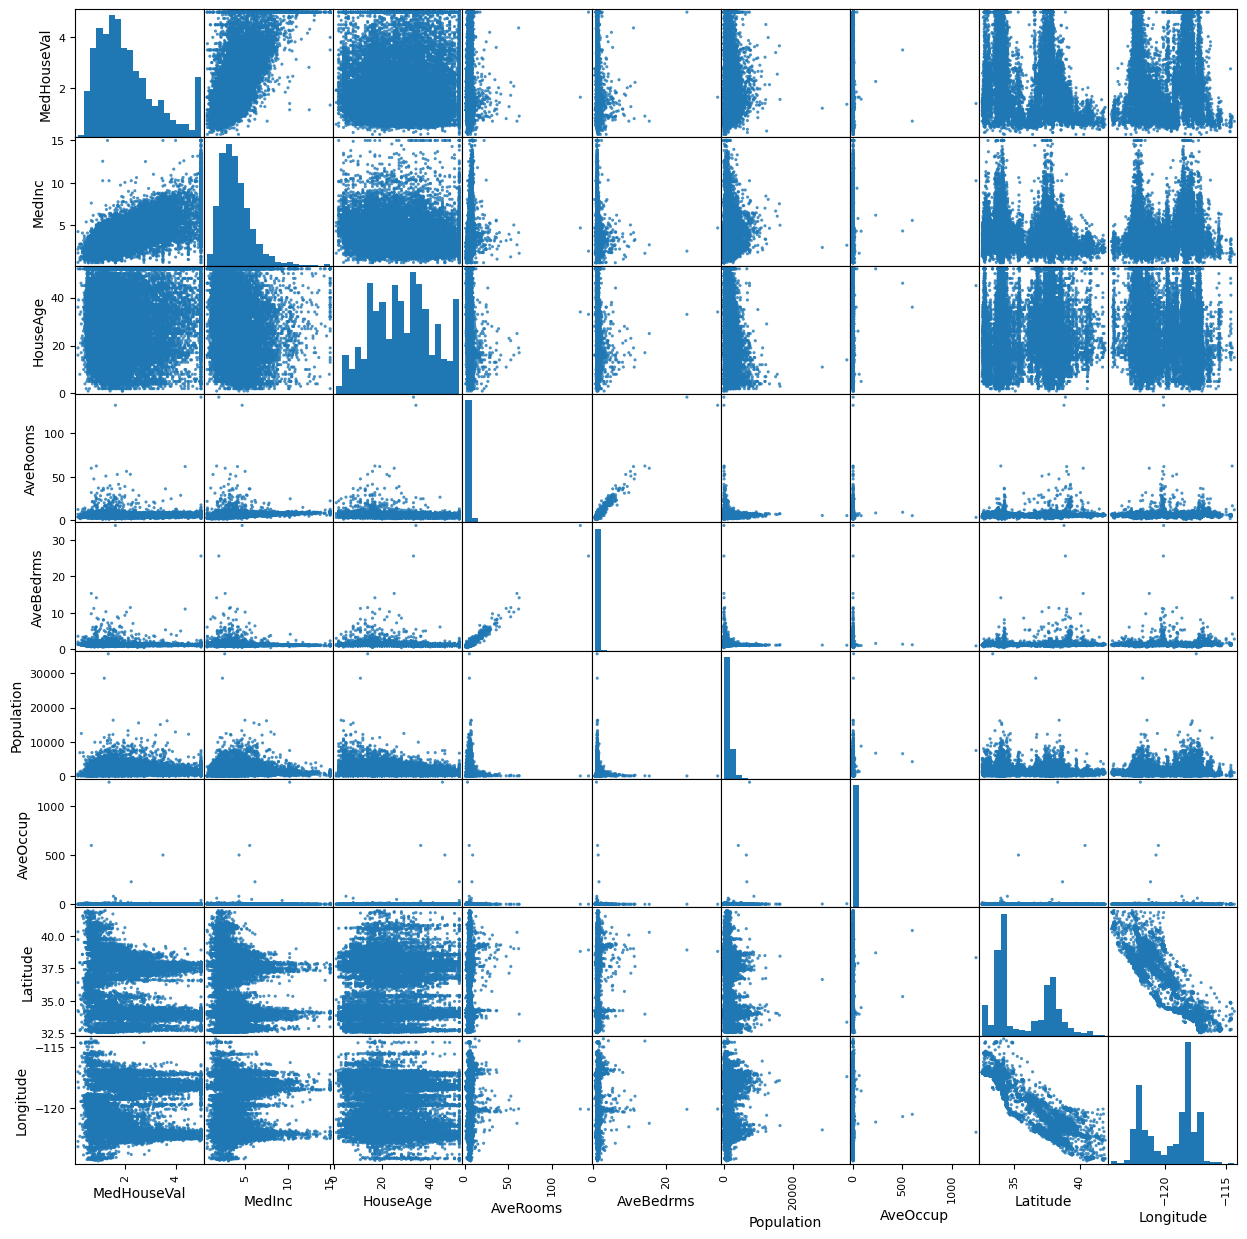

In [6]:
# Vizualise data
grr = pd.plotting.scatter_matrix(housing, figsize=(15, 15), marker='o',
 hist_kwds={'bins': 20}, s=5, alpha=.8)

In [7]:
# we see strong linear correlation between the variables AveBedrms, Average rms, for example. Few potential outliers are possibly 
#present  but will not be removed from the dataset for now.


In [8]:

print('target names:{}'.format(housing.columns[0]))
print('feature names:{}'.format(housing.columns[1:7]))

target names:MedHouseVal
feature names:Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup'],
      dtype='object')


# 2. Data splitting :

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(housing.drop(columns='MedHouseVal'), housing['MedHouseVal'],random_state=42)

print('Input train shape: {}'.format(X_train.shape))
print('Output y train shape: {} '.format(y_train.shape))


Input train shape: (15480, 8)
Output y train shape: (15480,) 


# 3. Multiple linear regression model:

In [10]:
# Here no need to scale the data as feature scaling does not affect the predicted output in linear regression.
# Furthermore, as we are interested in predictability more than interpretability of the model feature scaling is not required. 

lr = LinearRegression().fit(X_train,y_train)
print('Estimated coefficients {}'.format(np.round(lr.coef_,4)))
print("lr.intercept_: {}".format(np.round(lr.intercept_,4)))

Estimated coefficients [ 0.4476  0.0096 -0.1248  0.7945 -0.     -0.0034 -0.4186 -0.4334]
lr.intercept_: -37.0278


In [11]:
# R squared
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

# We observe poor R_squared results on the training set and on the test set as well. 
# Thus our model fails to explain enough of the variation of the response variable 
# There is some evidence of underfitting.

Training set score: 0.61
Test set score: 0.59


In [12]:
y_predtrain = lr.predict(X_train)
y_predtest = lr.predict(X_test)

# Training error 
MSE = mean_squared_error(y_train,y_predtrain)

# Testing error 
MSE_test = mean_squared_error(y_test,y_predtest)

print('Training error: {}'.format(round(MSE,3)))
print('Testing error: {}'.format(round(MSE_test,3)))

Training error: 0.521
Testing error: 0.541


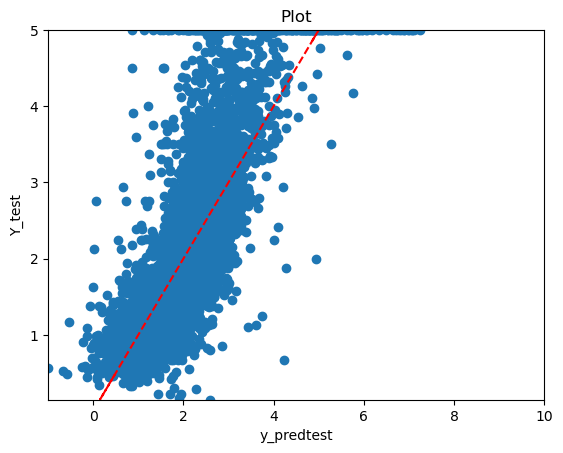

In [13]:
plt.plot(y_predtest,y_test,'o')
plt.xlabel('y_predtest')
plt.ylabel('Y_test')
plt.title('Plot')
plt.ylim(min(y_test), max(y_test))
plt.xlim(-1,10)
plt.plot(y_test, y_test, label='Line Plot', color='red', linestyle='--')

# 4. Regression tree fitting
In the previous section, fitting a multiple linear regression model leads to a moderate training error of 0.54 and a testing error of 0.541. Here, we have a case of underfitting. More flexible models such as regression trees and random forest may be more appropriate and may lead to a lower test error on our fixed test set. 

In [14]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor().fit(X_train, y_train)
pred_tree_test= tree.predict(X_test)
pred_tree_train= tree.predict(X_train)

# Training error 
MSE = mean_squared_error(y_train,pred_tree_train)

# Testing error 
MSE_test = mean_squared_error(y_test,pred_tree_test)

print('Training error {}'.format(round(MSE,2)))
print('Testing error {}'.format(round(MSE_test,2)))

Training error 0.0
Testing error 0.53


Now, the regression tree above has 0 training error and 0.51 testing error which is not good as we have overfitted the data here and thus having poor generalisation ability as shown by the testing error of 0.51


In [15]:
# here we will tune the depth of the tree by finding the optimal max_depth using cross validation error
# as an error metric

from sklearn.model_selection import GridSearchCV

model = DecisionTreeRegressor()
hyperparameters = {
    'max_depth': [i for i in range(1,100)]
}


grid_search = GridSearchCV(model, hyperparameters, cv= 5)
grid_search.fit(X_train, y_train) 

best_max_depth = grid_search.best_params_['max_depth']
best_model = grid_search.best_estimator_

y_pred_test = best_model.predict(X_test)

# Testing error 
MSE_testw= mean_squared_error(y_test,y_pred_test)

print('Testing error: {}'.format(round(MSE_testw,2)))
print("Best parameters: ", best_max_depth)


Testing error: 0.41
Best parameters:  9


Here we notice a big difference in testing error when we restricted our tree depth to a max_depth of 9. 

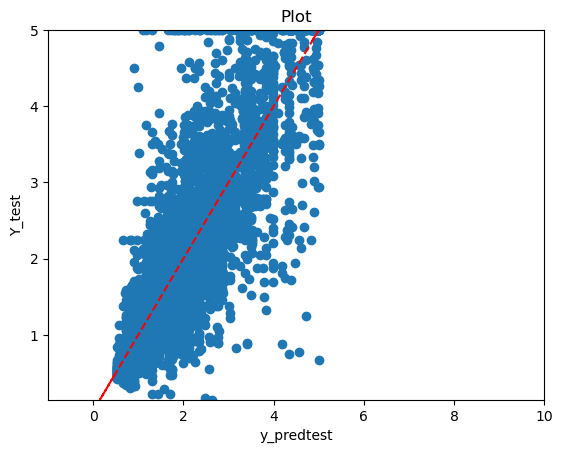

In [16]:
plt.plot(y_pred_test,y_test, 'o')
plt.xlabel('y_predtest')
plt.ylabel('Y_test')
plt.title('Plot')
plt.ylim(min(y_test), max(y_test))
plt.xlim(-1, 10)
plt.plot(y_test, y_test, label='Line Plot', color='red', linestyle='--')

In [17]:
# Visualising our tuned regression tree 
from sklearn.tree import export_graphviz

# Export the tree in the .dot format
dot_data = export_graphviz(best_model , out_file=None,
                           feature_names=housing.columns.drop('MedHouseVal'),
                           filled=True, rounded=True)

import graphviz

# Create a Graphviz graph from the .dot data
graph = graphviz.Source(dot_data)

# Save or display the graph
graph.render("regression_tree")  # Save the visualization to a file
graph.view() 

'regression_tree.pdf'

In [18]:
# Feature importance given by the cv selected regression tree

print('Feature importance: \n{}'.format(best_model.feature_importances_))

Feature importance: 
[0.63156881 0.0421223  0.03452839 0.01074411 0.01579601 0.1387336
 0.06472132 0.06178547]


The variables that explaines most of the variation of the target variables is: 
 MedHouseVal


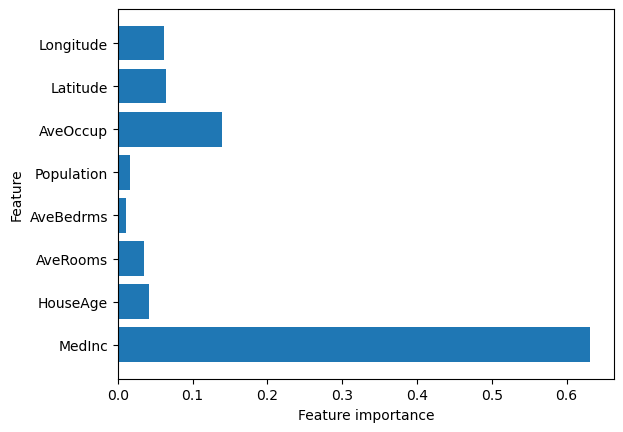

In [19]:
# plot feature importances 

def plot_feature_importances_housing(model):
    n_features = housing.shape[1] - 1 
    plt.barh(range(n_features), model.feature_importances_, align = 'center')
    plt.yticks(np.arange(n_features), list(housing.columns)[1:])
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    
    
plot_feature_importances_housing(best_model)


print('The variables that explaines most of the variation of the target variables is: \n {}'.format(list(housing.columns)[0]))


# 5. Random regression forest


In [20]:
# Here we construct a random regression forest estimator without using grid_search. Using mathematical analysis, we create trees that overfits the training data, 
# and increase the number of trees in the procedure as much as possible depending on computational constraints

from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators = 300, max_depth = X_train.shape[0], max_features= 4, random_state=42)
frst_1 = forest.fit(X_train,y_train)

yfrst_train_pred = frst_1.predict(X_train)
yfrst_test_pred = frst_1.predict(X_test)


MSE_forest_train = mean_squared_error(y_train,yfrst_train_pred)
MSE_forest_test = mean_squared_error(y_test,yfrst_test_pred)


print('Training error : {}'.format(round(MSE_forest_train,2)))
print('Testing error : {} '.format(round(MSE_forest_test,2)))

Training error : 0.03
Testing error : 0.24 


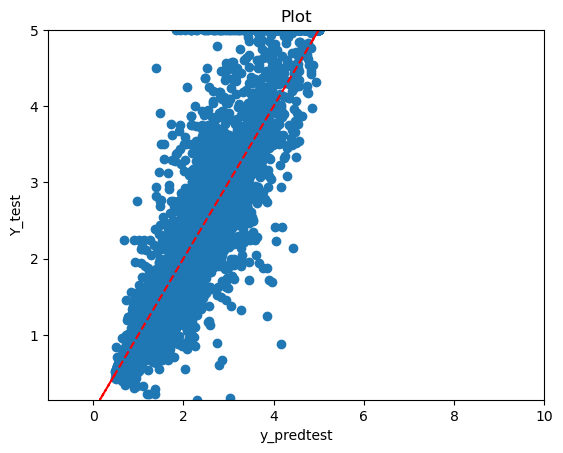

In [21]:
plt.plot(yfrst_test_pred,y_test, 'o')
plt.xlabel('y_predtest')
plt.ylabel('Y_test')
plt.title('Plot')
plt.ylim(min(y_test), max(y_test))
plt.xlim(-1, 10)
plt.plot(y_test, y_test, label='Line Plot', color='red', linestyle='--')


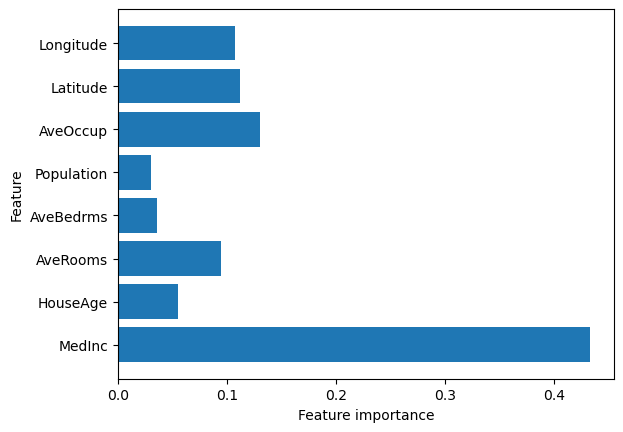

In [22]:
plot_feature_importances_housing(frst_1)
# Same results in terms of feature importance using random forests

# Conclusion


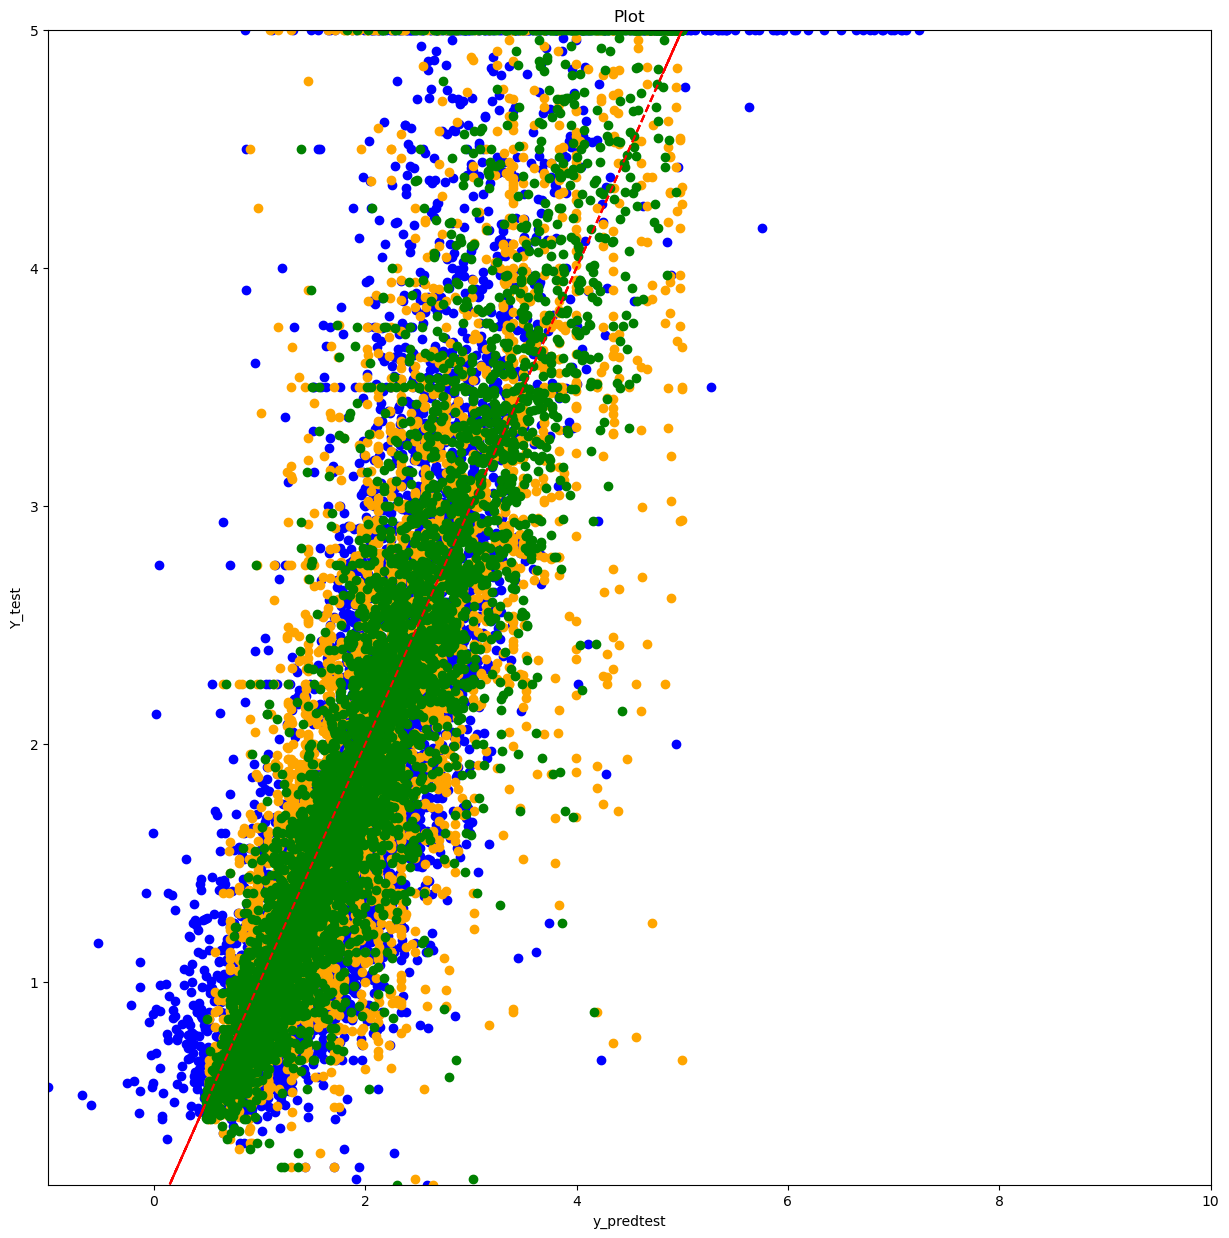

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))

plt.plot(y_predtest,y_test,'o', color ='blue')
plt.xlabel('y_predtest')
plt.ylabel('Y_test')
plt.title('Plot')
plt.ylim(min(y_test), max(y_test))
plt.xlim(-1,10)
plt.plot(y_test, y_test, label='Line Plot', color='red', linestyle='--')



plt.plot(y_pred_test,y_test, 'o', color = 'orange')
plt.xlabel('y_predtest')
plt.ylabel('Y_test')
plt.title('Plot')
plt.ylim(min(y_test), max(y_test))
plt.xlim(-1, 10)
plt.plot(y_test, y_test, label='Line Plot', color='red', linestyle='--')




plt.plot(yfrst_test_pred,y_test, 'o', color= 'green')
plt.xlabel('y_predtest')
plt.ylabel('Y_test')
plt.title('Plot')
plt.ylim(min(y_test), max(y_test))
plt.xlim(-1, 10)
plt.plot(y_test, y_test, label='Line Plot', color='red', linestyle='--')

# In the below plot we clearly see that the random forest estimator constructed has the lower test error among all 
# models created 